## Importing Libraries and dataset

In [87]:
# Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

In [88]:
# Importing dataset from file 
data_1_Uncleaned=pd.read_csv("../data/benin-malanville.csv")
data_2_Uncleaned=pd.read_csv("../data/sierraleone-bumbuna.csv")
data_3_Uncleaned=pd.read_csv("../data/togo-dapaong_qc.csv")

## Data Cleaning

In [89]:
# Cleaning of data
data_1 = data_1_Uncleaned.dropna(axis=1, how='all')
data_2 = data_2_Uncleaned.dropna(axis=1, how='all')
data_3 = data_3_Uncleaned.dropna(axis=1, how='all')

## Data Quality Check


In [90]:
# Checking for a missing value
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
missing_value = name_of_data.isnull().sum()
print("Missing Values in the data are:\n", missing_value)

Missing Values in the data are:
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [91]:
# Checking for a negative value
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
negative_value = name_of_data[(name_of_data['GHI'] < 0) | (name_of_data['DNI'] < 0) | (name_of_data['DHI'] < 0)]
print("Negative values in the data are:\n", negative_value)

Negative values in the data are:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0

## General statistics analysis of datasets

In [92]:
# Display the general summary statistics of dataset
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
name_of_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


## Temperature Analysis

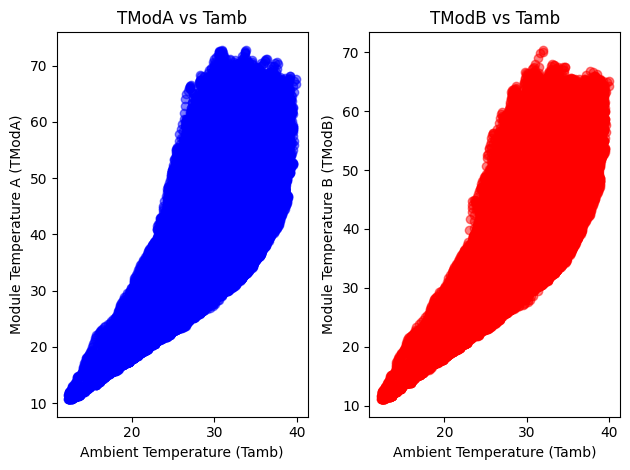

In [93]:
# Display Temperature Analysis
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

plt.subplot(1, 2, 1)
plt.scatter(name_of_data['Tamb'], name_of_data['TModA'], color='blue', alpha=0.5)
plt.title('TModA vs Tamb')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Module Temperature A (TModA)')


plt.subplot(1, 2, 2)
plt.scatter(name_of_data['Tamb'], name_of_data['TModB'], color='red', alpha=0.5)
plt.title('TModB vs Tamb')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Module Temperature B (TModB)')

plt.tight_layout()
plt.show()

## Correlation Analysis

In [94]:
# Display Correlation Analysis
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
correlation_of_TModA = name_of_data['Tamb'].corr(name_of_data['TModA'])
correlation_of_TModB = name_of_data['Tamb'].corr(name_of_data['TModB'])

print(f"Correlation coefficient between Tamb and TModA: {round(correlation_of_TModA, 4)}")
print(f"Correlation coefficient between Tamb and TModB: {round(correlation_of_TModB, 4)}")

Correlation coefficient between Tamb and TModA: 0.8319
Correlation coefficient between Tamb and TModB: 0.8551


# Time Series Analysis

C:\Users\Eyobe\AppData\Local\Temp\ipykernel_8012\3885231564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_of_data ['Timestamp'] = pd.to_datetime(name_of_data['Timestamp'])


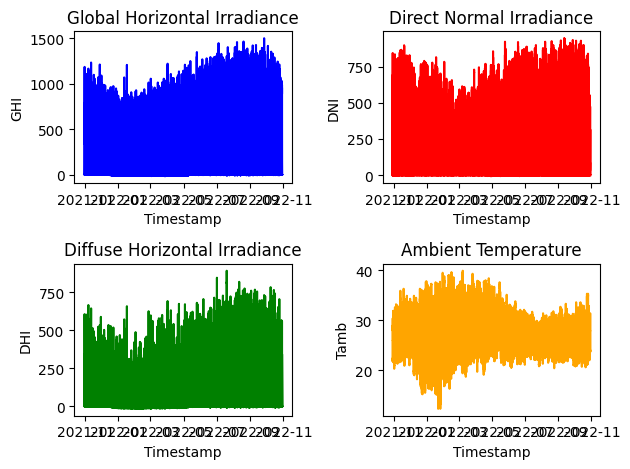

In [95]:
# Display Temperature Analysis
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

name_of_data ['Timestamp'] = pd.to_datetime(name_of_data['Timestamp'])
name_of_data.set_index('Timestamp', inplace=True)

plt.subplot(2, 2, 1)
plt.plot(name_of_data['GHI'], color='blue')
plt.title('Global Horizontal Irradiance')
plt.xlabel('Timestamp')
plt.ylabel('GHI')

plt.subplot(2, 2, 2)
plt.plot(name_of_data['DNI'], color='red')
plt.title('Direct Normal Irradiance')
plt.xlabel('Timestamp')
plt.ylabel('DNI')


plt.subplot(2, 2, 3)
plt.plot(name_of_data['DHI'], color='green')
plt.title('Diffuse Horizontal Irradiance')
plt.xlabel('Timestamp')
plt.ylabel('DHI')

plt.subplot(2, 2, 4)
plt.plot(name_of_data['Tamb'], color='orange')
plt.title('Ambient Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Tamb')

plt.tight_layout()
plt.show()

# Wind Analysis

C:\Users\Eyobe\AppData\Local\Temp\ipykernel_8012\1811681728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_of_data['Timestamp'] = pd.to_datetime(name_of_data['Timestamp'])


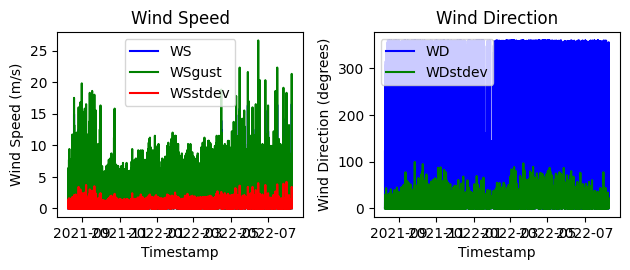

In [103]:
# Display Wind Analysis
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

name_of_data['Timestamp'] = pd.to_datetime(name_of_data['Timestamp'])
name_of_data.set_index('Timestamp', inplace=True)


plt.subplot(2, 2, 1)
plt.plot(name_of_data['WS'], color='blue', label='WS')
plt.plot(name_of_data['WSgust'], color='green', label='WSgust')
plt.plot(name_of_data['WSstdev'], color='red', label='WSstdev')
plt.title('Wind Speed')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed (m/s)')
plt.legend()



plt.subplot(2, 2, 2)
plt.plot(name_of_data['WD'], color='blue', label='WD')
plt.plot(name_of_data['WDstdev'], color='green', label='WDstdev')
plt.title('Wind Direction')
plt.xlabel('Timestamp')
plt.ylabel('Wind Direction (degrees)')
plt.legend()


plt.tight_layout()
plt.show()

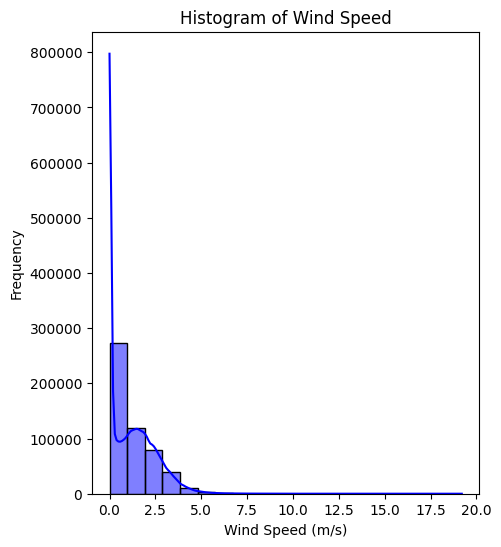

In [98]:
# Display Histogram of Wind Speed
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

plt.figure(figsize=(5, 6))
sns.histplot(name_of_data['WS'], bins=20, kde=True, color='blue')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x1000 with 0 Axes>

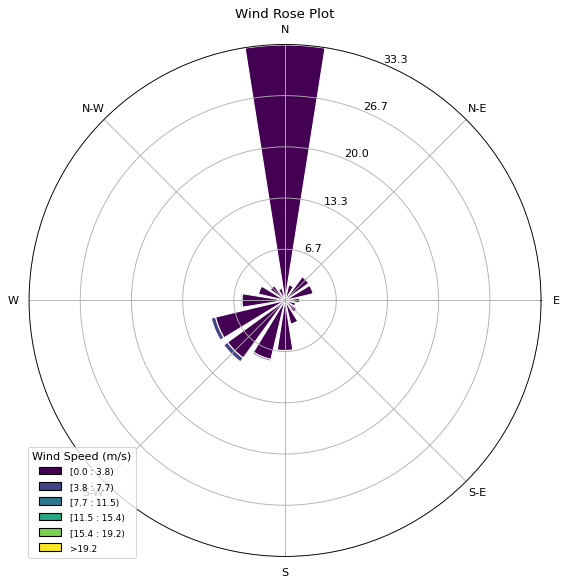

In [99]:
# Display Wind Speed
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]

plt.figure(figsize=(10, 10))
ax = WindroseAxes.from_ax()
ax.bar(name_of_data['WD'], name_of_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose Plot')
plt.show()

## Plotting

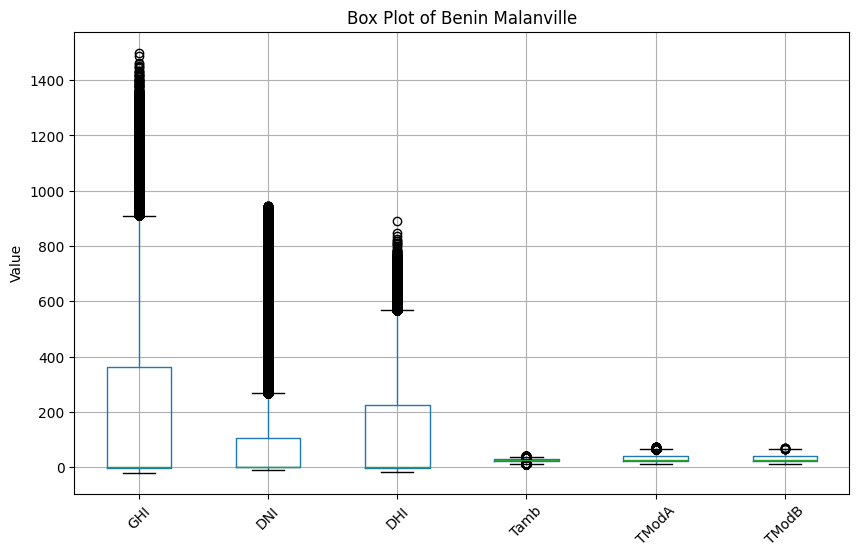

In [100]:
#Display Box Plot of a dataset
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
target_columns_to_look_1 = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB']
plt.figure(figsize=(10, 6))
name_of_data[target_columns_to_look_1].boxplot()
plt.title('Box Plot of Benin Malanville')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Frequency')

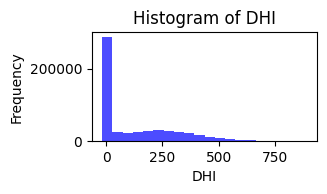

In [101]:
# Display Histograms of a dataset
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_colmun = input("Which colmun of data do you want to display: ")
name_of_data  = locals()[name_of_data]
plt.subplot(3, 2, 1)
plt.hist(name_of_data[name_of_colmun], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of '+ name_of_colmun)
plt.xlabel(name_of_colmun)
plt.ylabel('Frequency')

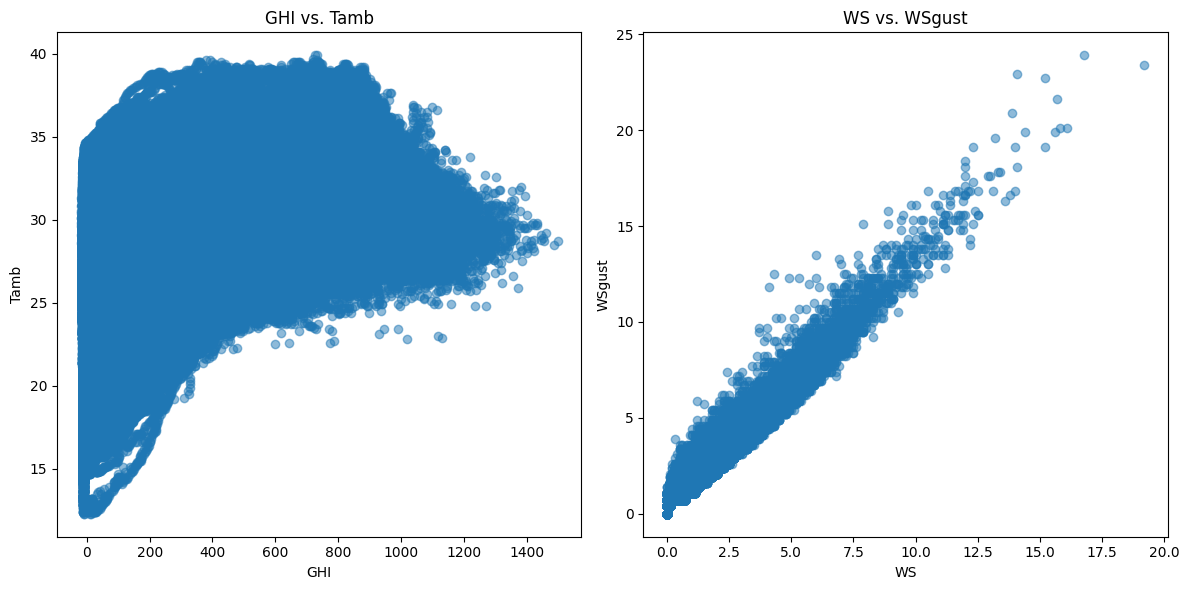

In [102]:
# Display Scatterplots of a dataset
name_of_data = input("Enter dataset name here (info: data_1 is Benin Malanville, data_2 is Sierraleone Bumbuna and data_3 is Togo Dapaong QC): ")
name_of_data = locals()[name_of_data]
scatter_plot= [('GHI', 'Tamb'), ('WS', 'WSgust')]
plt.figure(figsize=(12, 6))
for i, pair in enumerate(scatter_plot, start=1):
    plt.subplot(1, len(scatter_plot), i)
    plt.scatter(name_of_data[pair[0]], name_of_data[pair[1]], alpha=0.5)
    plt.title(f'{pair[0]} vs. {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
plt.tight_layout()